In [1]:
import numpy as np  
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
np.shape(x_train)

(60000, 28, 28)

In [3]:
print np.shape(y_train)
print y_train[0:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [4]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train) 
y_train_onehot[:3]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [5]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [6]:
x_train_norm = x_train_1D.astype('float32')
x_train_norm = x_train_norm/255

In [8]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

input_img = Input(shape=(28*28,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='Adam')
train_history = autoencoder.fit(x=x_train_norm, y=x_train_norm, batch_size=100, epochs=10, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1870
Epoch 2/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1214
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1099
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1044
Epoch 5/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1004
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0975
Epoch 7/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0951
Epoch 8/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0933
Epoch 9/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0919
Epoch 10/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0907


In [16]:
np.shape(x_test)

(10000, 28, 28)

In [17]:
x_test_1D = x_test.reshape(10000, 28*28)
x_test_1D = x_test_1D.astype('float32')
x_test_norm = x_test_1D/255

In [18]:
decoded_imgs = autoencoder.predict(x_test_norm)

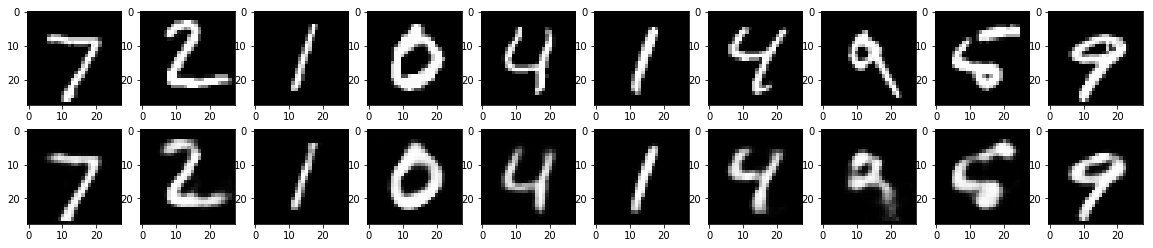

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):    
    plt.subplot(2, n, i + 1)
    img = x_test_1D[i].reshape(28,28)
    plt.imshow(img)
    
    plt.subplot(2, n, i + 1 + n)
    img = decoded_imgs[i].reshape(28,28)
    plt.imshow(img)
plt.gray()